In [12]:
# a) import
library(readr)
library(dplyr)
raw_data <- read.csv("testing_covid.csv")


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
head(raw_data)

# (b)
# scales and types
# country: qualitative, discrete, nominal
# country_code: qualitative, discrete, nominal
# year_week: quantiative, discrete, intervall
# level: qualitative, discrete, nominal
# region: qualitative, discrete nominal
# region_name: qualitative, discrete nominal
# new_cases: quantitative, discrete, absolute
# tests_done: quantitative, discrete, abosolute
# population: quantitative, discrete, absolute
# testing_rate: quantitative, continious, absolute
# positivity_rate: quantitative, continious, absolute
# testint_data_soiruce: qualitative, discrete, nominal

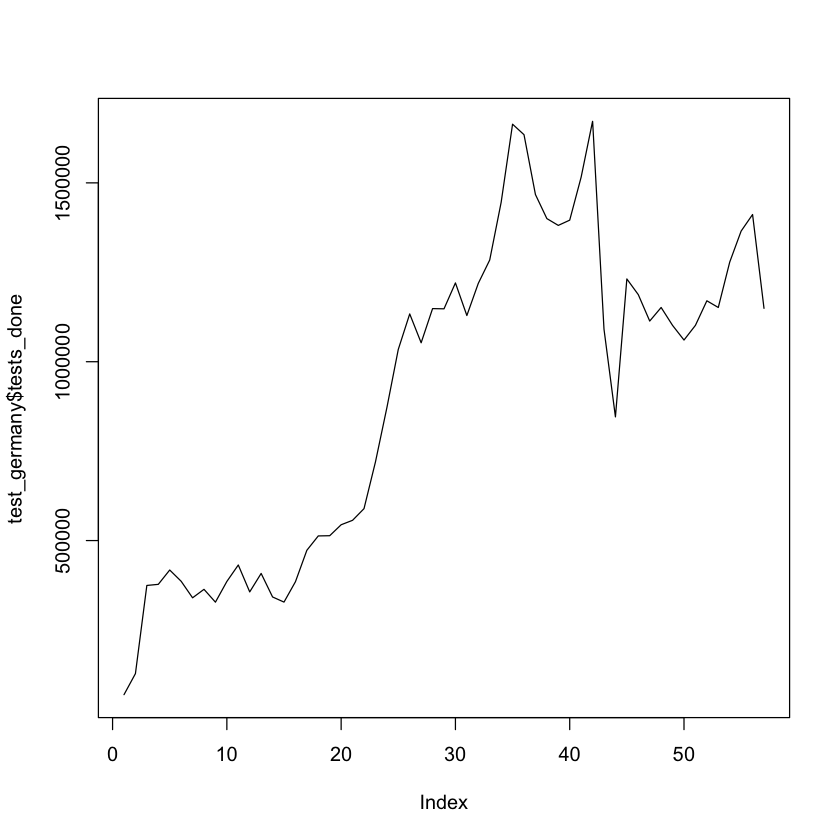

In [14]:
# c)
test_germany <- raw_data %>% filter(country_code == 'DE') %>% select(year_week,tests_done)
plot(test_germany$tests_done, type='l')

In [ ]:
raw_data %>% filter(country_code == 'IT') %>%  group_by(level)

In [ ]:

# d)
raw_data %>% filter(year_week >= '2020-W50')
sum_of_tests <- raw_data %>% filter(country_code %in% c('DE','AT','FR','IT')) %>% 
  filter(year_week >='2020-W49' & year_week <= '2020-W53') %>% filter(level == 'national') %>%
  group_by(level) %>% 
  sum(tests_done)

sum_of_tests

sum_of_tests <- sum_of_tests %>% group_by(country_code) %>% summarise(sum_new_cases = sum(new_cases),
                                                                      sum_tests_done = sum(tests_done))

sum_of_tests

# pie plot
pie(sum_of_tests$sum_new_cases/sum_of_tests$sum_tests_done, labels=sum_of_tests$country_code)

# e)
measures_testingrate <- raw_data %>% filter(country_code %in% c('DE', 'FR'), level =='national') %>% 
  group_by(country_code) %>% summarise(
    min= min(testing_rate),
    max= max(testing_rate),
    q1 = quantile(testing_rate, 0.25, type = 1),
    q2 = quantile(testing_rate, 0.5, type = 1),
    q3 = quantile(testing_rate, 0.75, type = 1)
  )
measures_testingrate
# side by side boxplot
data <- raw_data %>% filter(country_code %in% c('DE', 'FR'), level =='national')
data
boxplot(data$testing_rate~data$country_code)
